# Generate Light Curves

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

for f in glob.iglob("./output/*"): # delete all output files 
    print 'Deleting', f
    os.remove(f)

for f in glob.iglob("./data/*.mp4"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        
        b = np.zeros(6000)

        cap = cv2.VideoCapture(f)

        count = 0
        first = True
        while True:
            ret,frame = cap.read()
            if (first):
                cv2.imwrite('./output/' + st + '_first_frame.jpg', frame)     # save frame as JPEG file 
                first = False
                
            if (not ret):
                cv2.imwrite('./output/' + st + '_last_frame.jpg', frame_old)     # save frame as JPEG file    
                break
                
            frame_old = frame
            crop_img = frame[0:320, 0:1024]
            b[count] = crop_img.ravel().sum() / (320 * 1024)
            cv2.imshow(st,frame)
            count = count + 1
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break       

        #time.sleep(1)
        cap.release()
        cv2.destroyAllWindows()  # destroy all the opened windows

        pd.DataFrame(b).to_csv(f + '.csv')
        
    except Exception as e: 
        print e
        cv2.imwrite('./output/' + st + '_last_frame.jpg', frame_old)     # save frame as JPEG file    
        pass


Deleting ./output/vid_2019-08-03_13-10-35.mp4_first_frame.jpg


# Plot Light Curves

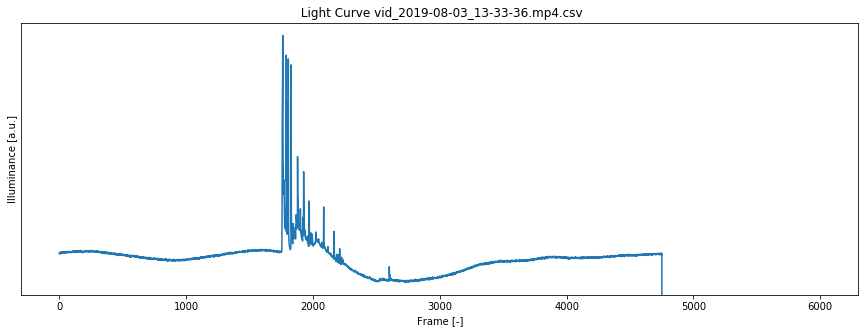

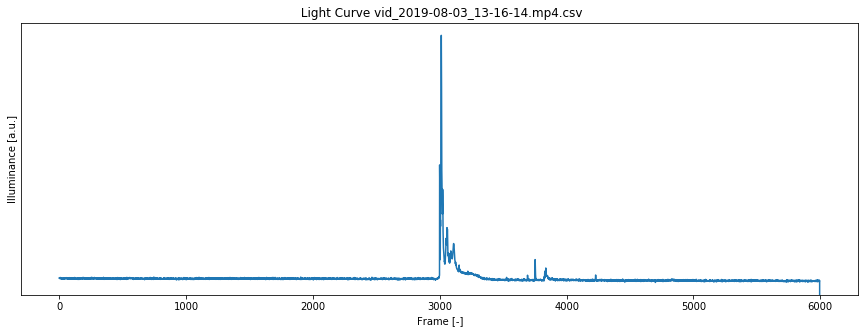

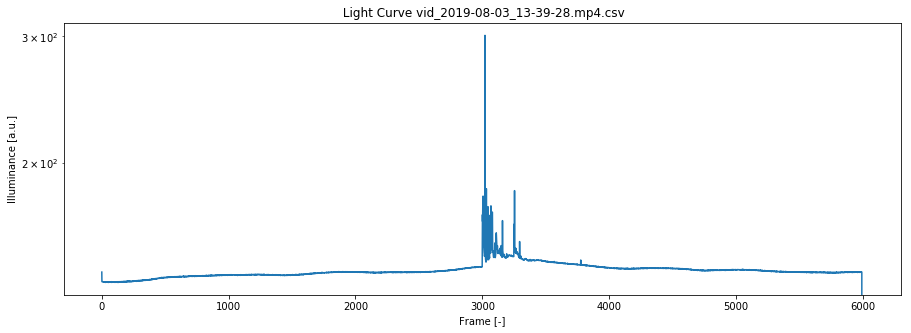

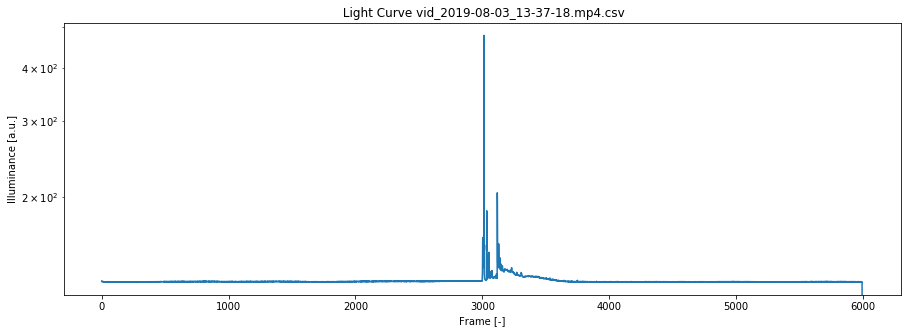

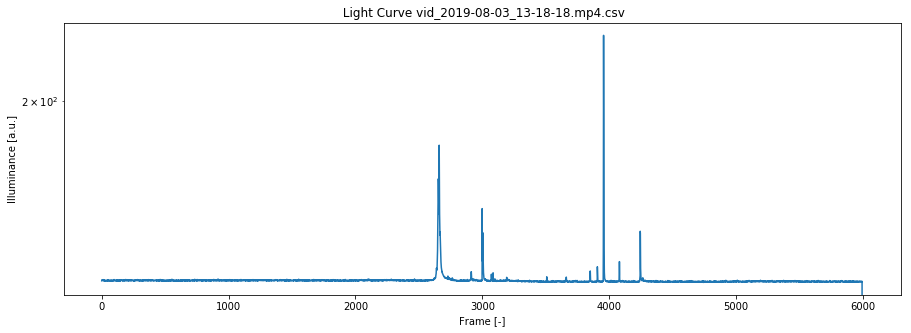

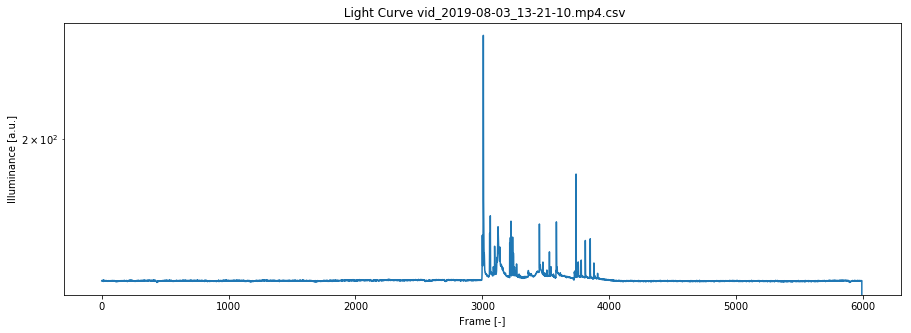

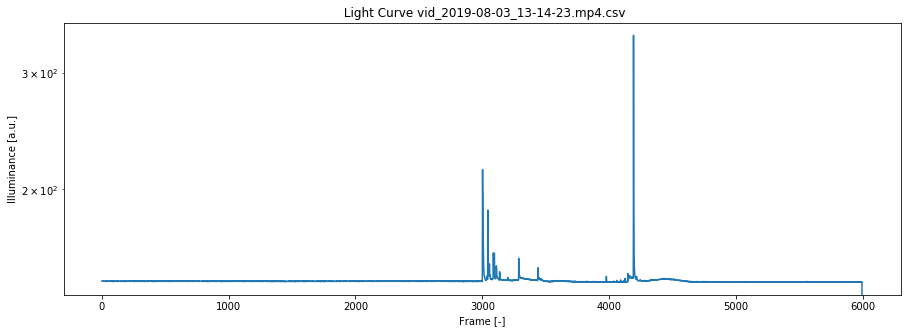

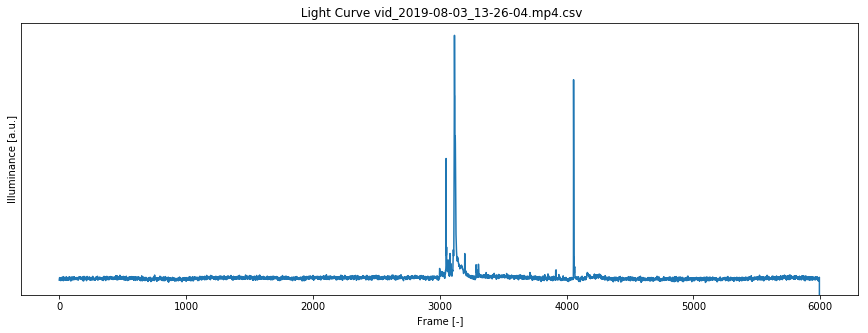

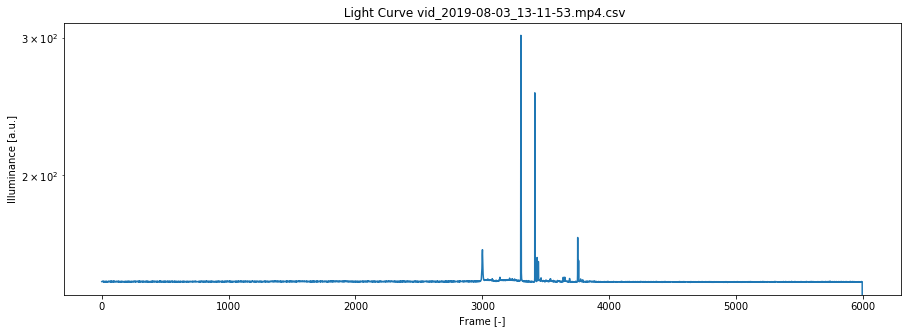

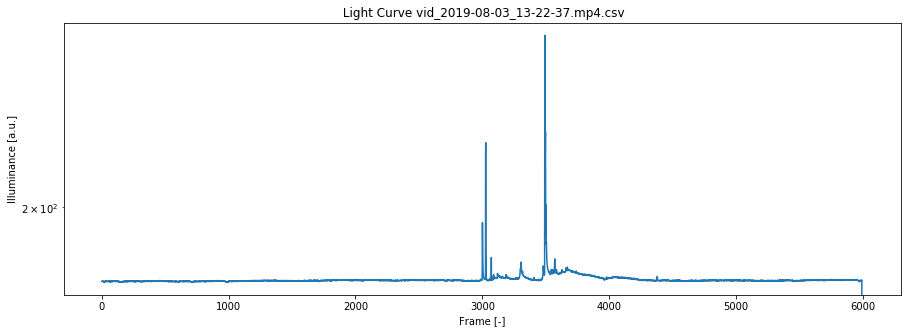

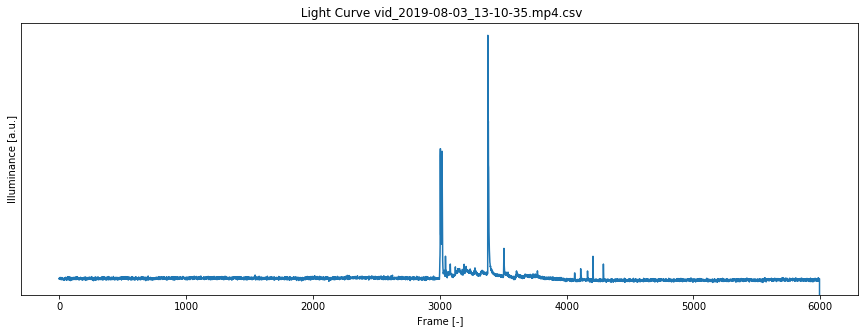

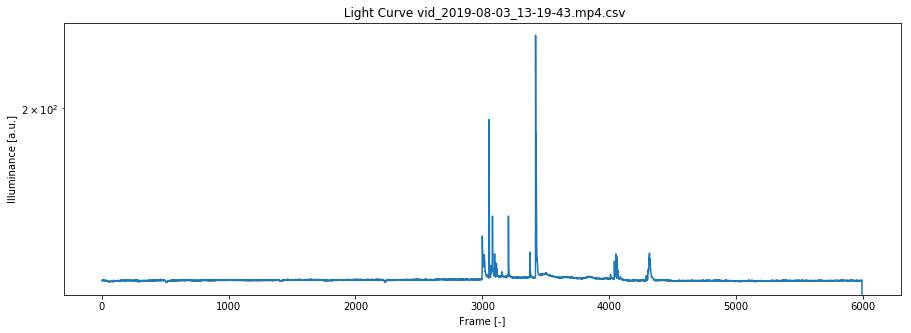

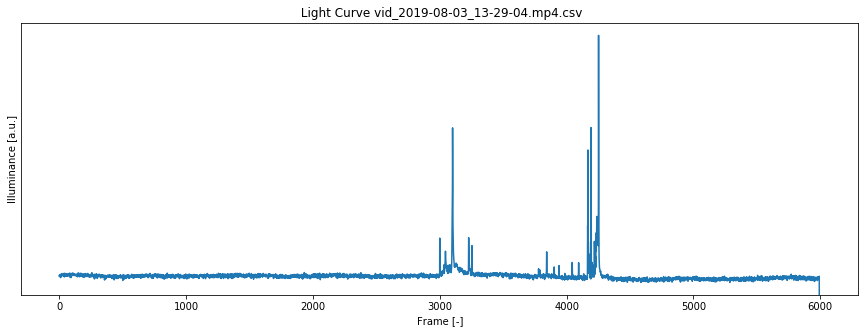

In [112]:
for f in glob.iglob("./data/*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]

        y = pd.read_csv(f)

        plt.figure(figsize=(15,5))
        plt.plot(y['0'])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Frame [-]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass


# Plot Light Curves in correct Time

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.
  del sys.path[0]


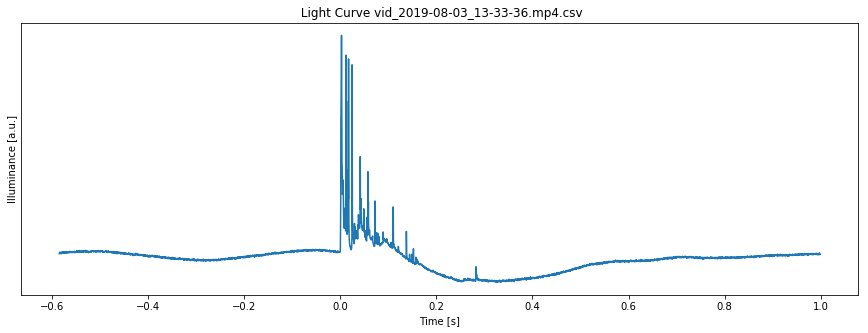

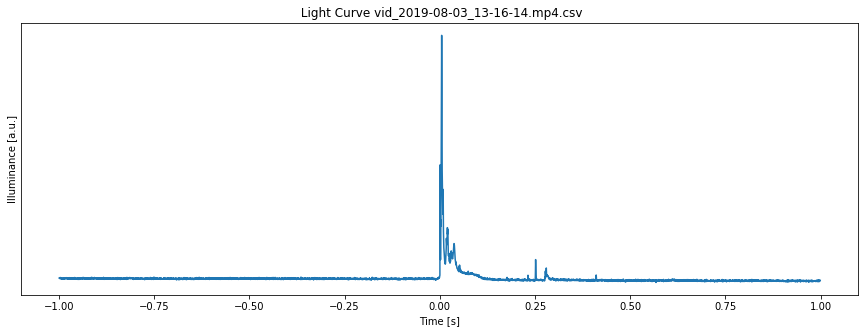

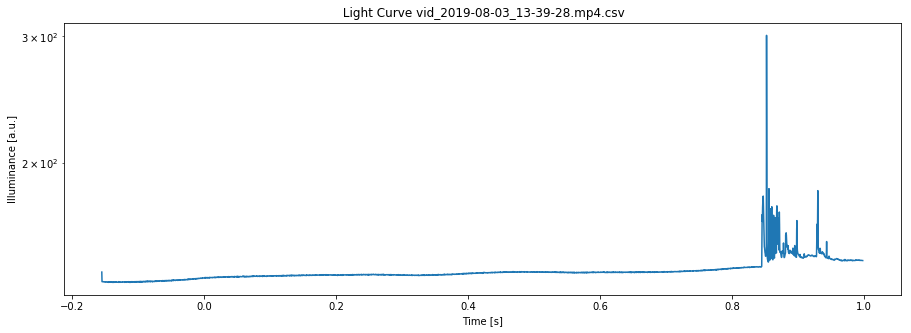

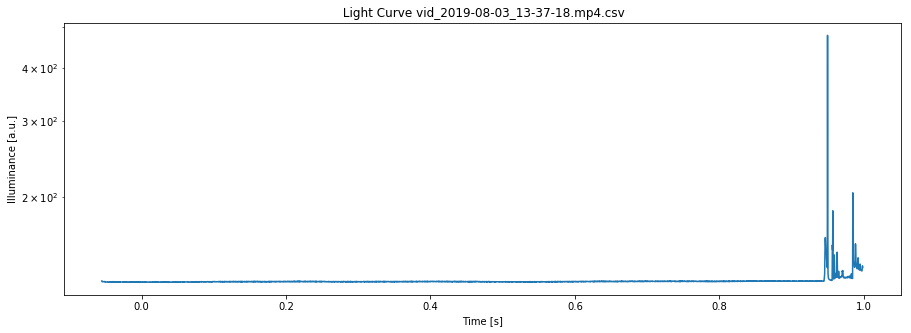

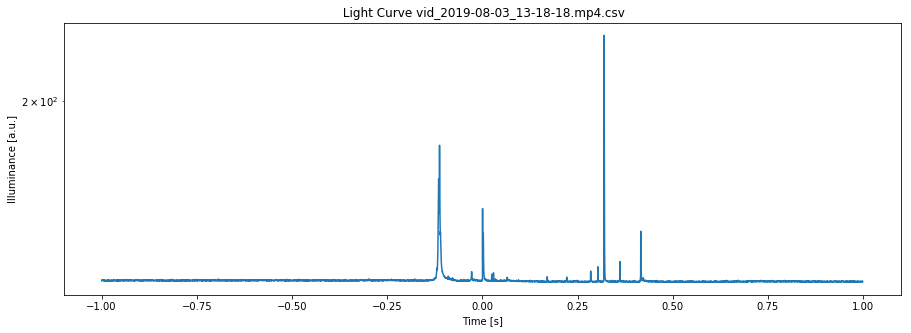

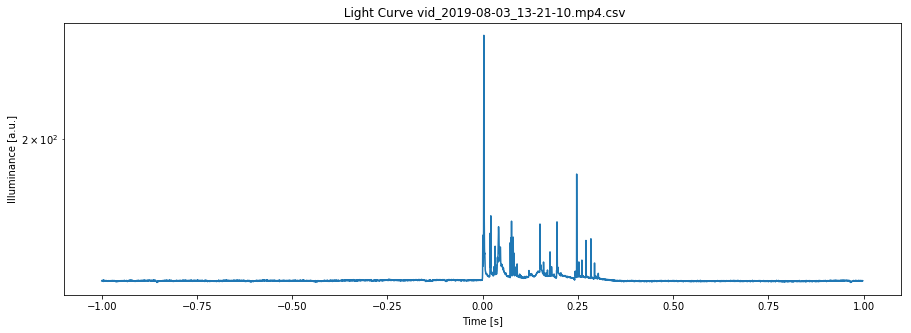

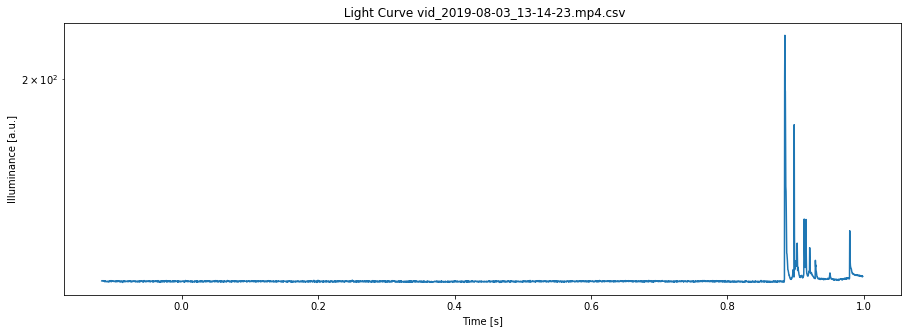

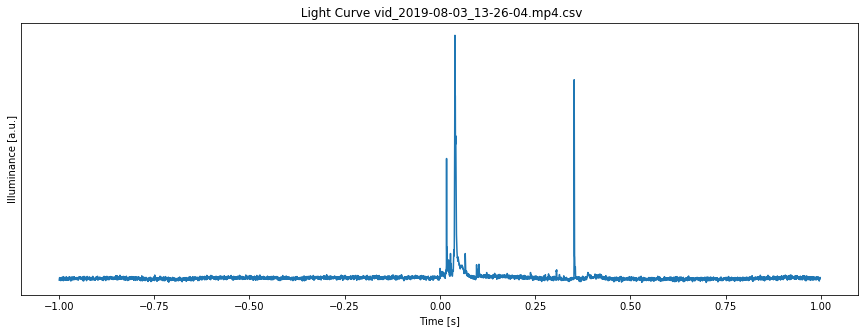

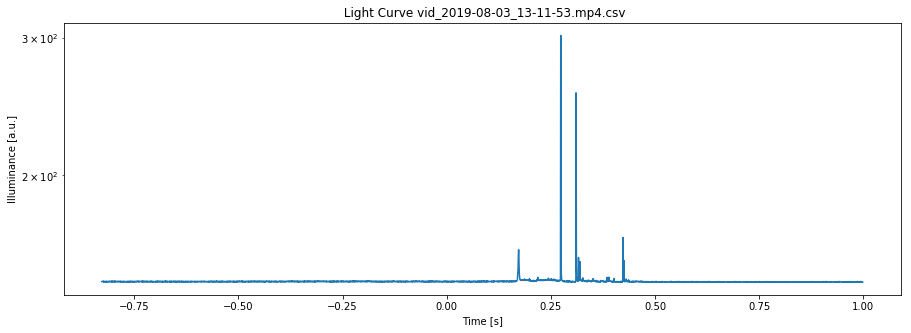

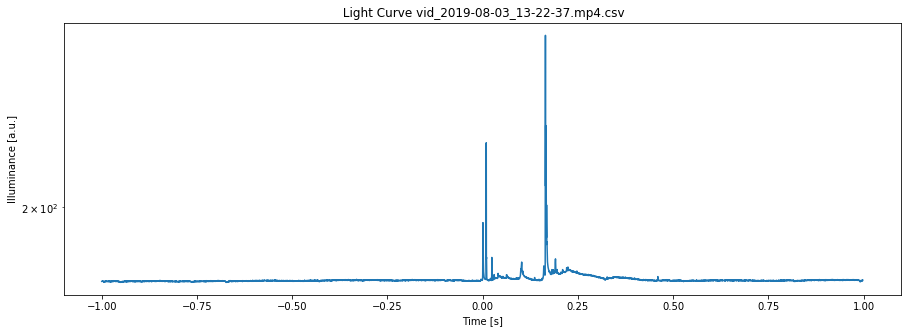

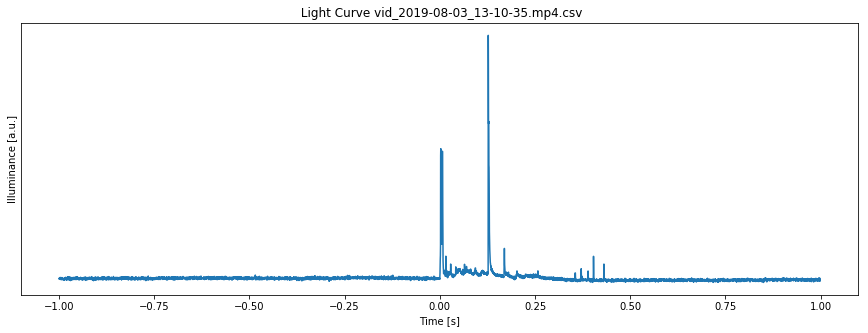

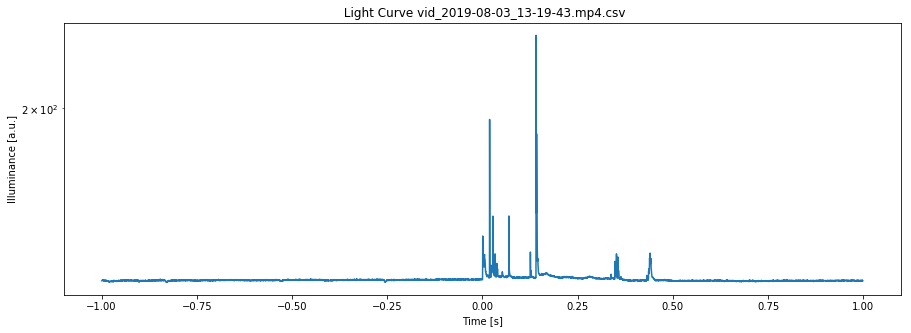

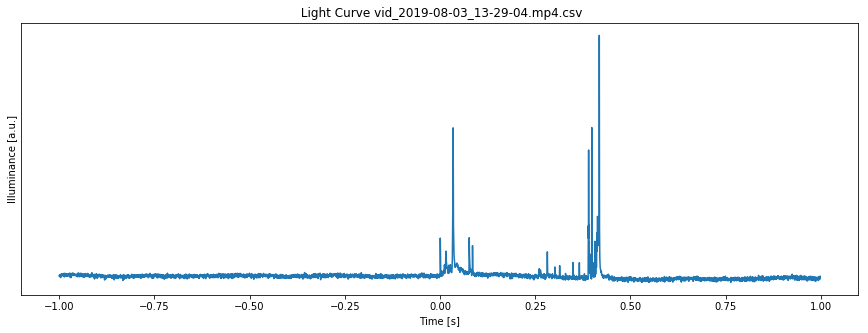

In [113]:
for f in glob.iglob("./data/*.*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )
        plt.figure(figsize=(15,5))

        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass


# Plot Light Curve together with Antenna data

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.


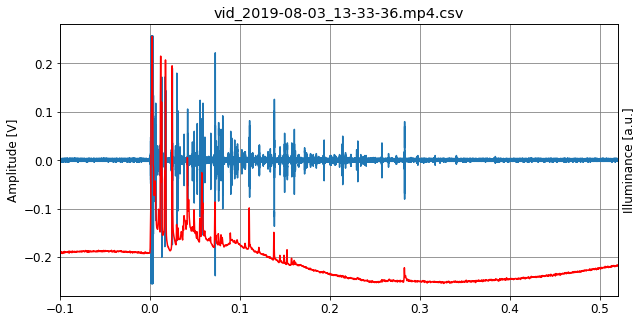

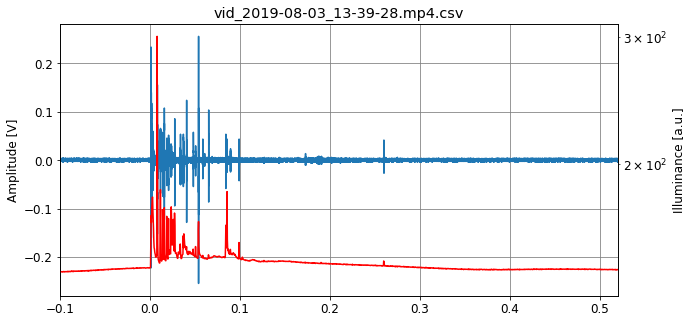

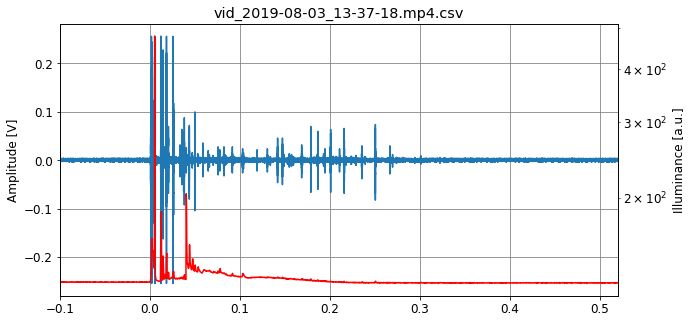

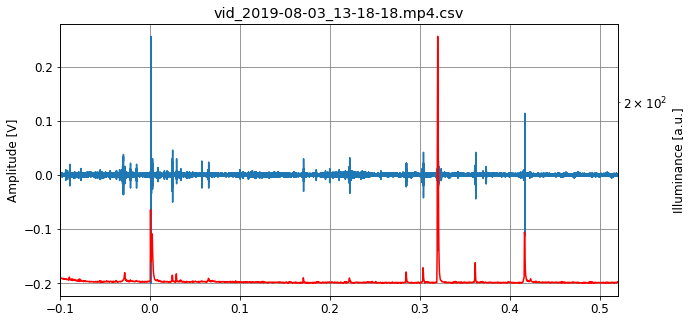

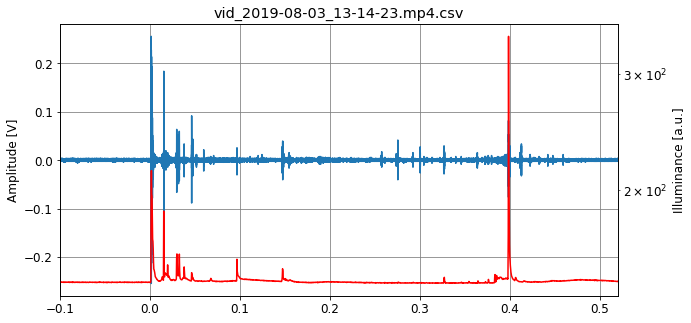

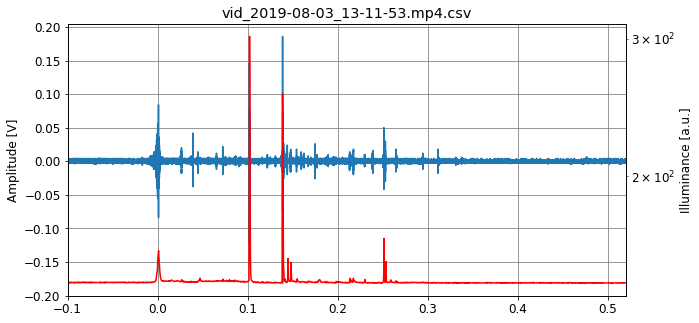

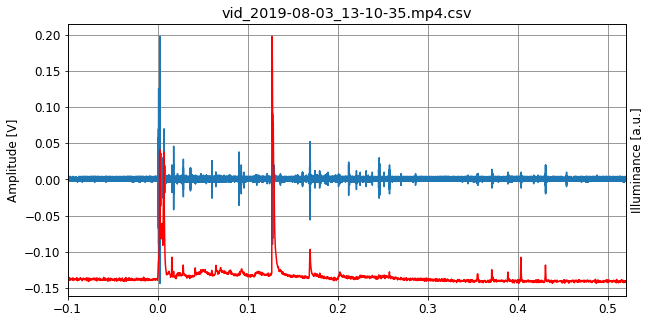

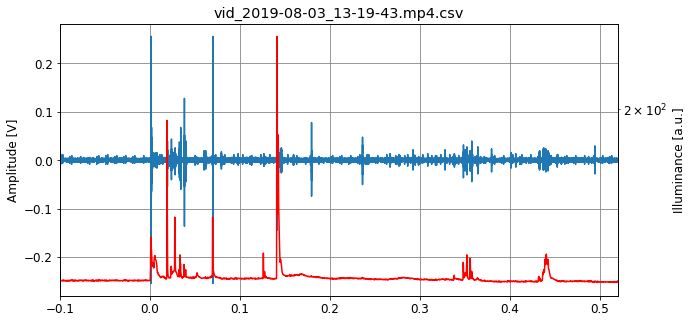

In [155]:
%matplotlib inline

for f in glob.iglob("./data/*.*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )


        
        param = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', nrows=1, header=0, comment='*',engine='python' )

        timeinc = param['Increment']
        timeoffset = param['Start']

        dfa = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', skiprows=2, header=None, comment='*',engine='python' )

        dfa[0] = pd.to_numeric(dfa[0])

        dfa[0]*=float(param['Increment'])
        dfa[0]+=float(param['Start'])


        plt.figure(figsize=(10,5))
        plt.rc('font', size=12)    

        plt.plot(dfa[0],dfa[1])

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.ylabel('Amplitude [V]')
        plt.xlim(-0.1,0.52)

        plt.twinx()
        
        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1], c='r')
        plt.yscale('log')
        plt.title(st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass

    



In [144]:
df.iloc[0,4]

'Newfile6.csv'